# A. ANOVA and other stat
Author: Shanshan Yang, Bioinformatics Core, ASU 
Time: Dec 11, 2017

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
datafile="A.anova.csv"
data=pd.read_csv(datafile)

In [4]:
data.head()
data

,cellline,Phenotype,mutation_type
0,cellline1,1.006932,2
1,cellline2,1.127197,2
2,cellline3,8.203515,2
3,cellline4,8.871560,2
4,cellline5,9.141132,1
5,cellline6,9.571941,2
6,cellline7,10.964782,2
7,cellline8,35.892193,2
8,cellline9,41.879357,0
9,cellline10,44.055486,2


# change column data type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
cellline         19 non-null object
Phenotype        19 non-null float64
mutation_type    19 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 528.0+ bytes


In [5]:
data['mutation_type']=data['mutation_type'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
cellline         19 non-null object
Phenotype        19 non-null float64
mutation_type    19 non-null category
dtypes: category(1), float64(1), object(1)
memory usage: 499.0+ bytes


# create a boxplot 

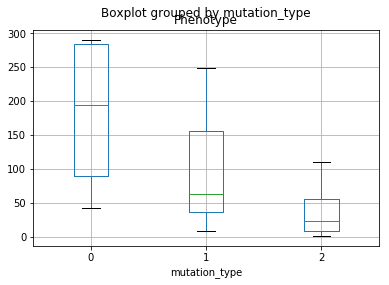

In [7]:
data.boxplot('Phenotype',by='mutation_type')

# ANOVA

In [6]:
wildtype = data['Phenotype'][data['mutation_type'] == 0]
stop = data['Phenotype'][data['mutation_type'] == 1]
mutation = data['Phenotype'][data['mutation_type'] == 2]
#print wildtype

In [7]:
from scipy import stats
 
F, p = stats.f_oneway(wildtype,stop,mutation)
print "ANOVA P-value for p53 mutation", p

ANOVA P-value for p53 mutation 0.0173000919169


# Tukey's range test (multiple means comparison)
Tukey's range test, also known as the Tukey's test, Tukey method, Tukey's honest significance test, Tukey's HSD (honest significant difference) test, is a single-step multiple comparison procedure and statistical test. It can be used on raw data or in conjunction with an ANOVA (post-hoc analysis) to find means that are significantly different from each other.

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [9]:
mc=MultiComparison(data['Phenotype'],data['mutation_type'])
Tukey_result=mc.tukeyhsd()
print Tukey_result

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper   reject
-------------------------------------------------
  0      1     -72.9021 -225.0812  79.277  False 
  0      2    -141.7095 -256.7461 -26.6729  True 
  1      2     -68.8074 -197.4222 59.8074  False 
-------------------------------------------------


# OLS
Linear models allows estimation by ordinary least squares (OLS).


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Phenotype ~ mutation_type',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table
print mod.summary()

/Users/shanshanyang/anaconda/envs/gl-env/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                     sum_sq    df         F  PR(>F)
mutation_type  63059.633366   2.0  5.284155  0.0173
Residual       95469.770093  16.0       NaN     NaN
                            OLS Regression Results                            
Dep. Variable:              Phenotype   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     5.284
Date:                Wed, 13 Dec 2017   Prob (F-statistic):             0.0173
Time:                        14:23:17   Log-Likelihood:                -107.92
No. Observations:                  19   AIC:                             221.8
Df Residuals:                      16   BIC:                             224.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t   

/Users/shanshanyang/anaconda/envs/gl-env/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


# T-test

In [15]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
t,p=ttest_ind(wildtype,stop, equal_var=False)
print 't-test p-value for tumor subtype',p

t-test p-value for tumor subtype 0.48455905737


In [16]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
t,p=ttest_ind(wildtype,mutation, equal_var=False)
print 't-test p-value for tumor subtype',p

t-test p-value for tumor subtype 0.106616090795
